In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setup

In [2]:
import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if (kaggle):
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *
    !pip install kaggle
    
%matplotlib inline
from fastai.vision.all import *

DATA = untar_data(URLs.CUB_200_2011)
image_path = DATA/'/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'

In [3]:
NB_DIR = Path.cwd()
MODELS = NB_DIR/'..'/'models'
MODELS.mkdir(exist_ok=True)

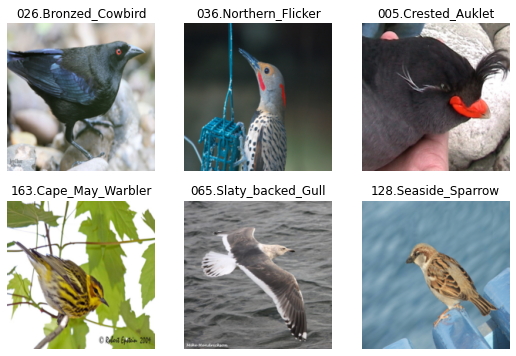

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(image_path, bs=32)

dls.show_batch(max_n=6)



In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.833049,2.505805,0.622826,01:27


epoch,train_loss,valid_loss,error_rate,time
0,2.348426,1.777449,0.470089,01:23
1,1.523346,1.439548,0.393721,01:21
2,0.760986,1.360038,0.372507,01:21


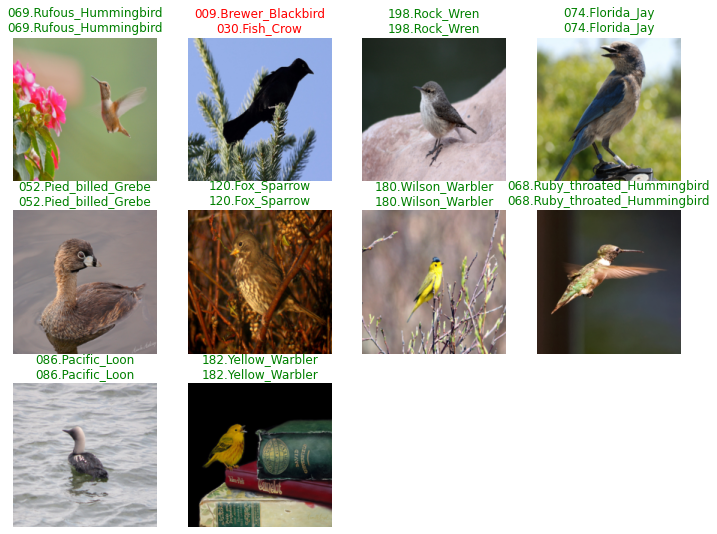

In [6]:
learn.show_results(max_n=10)

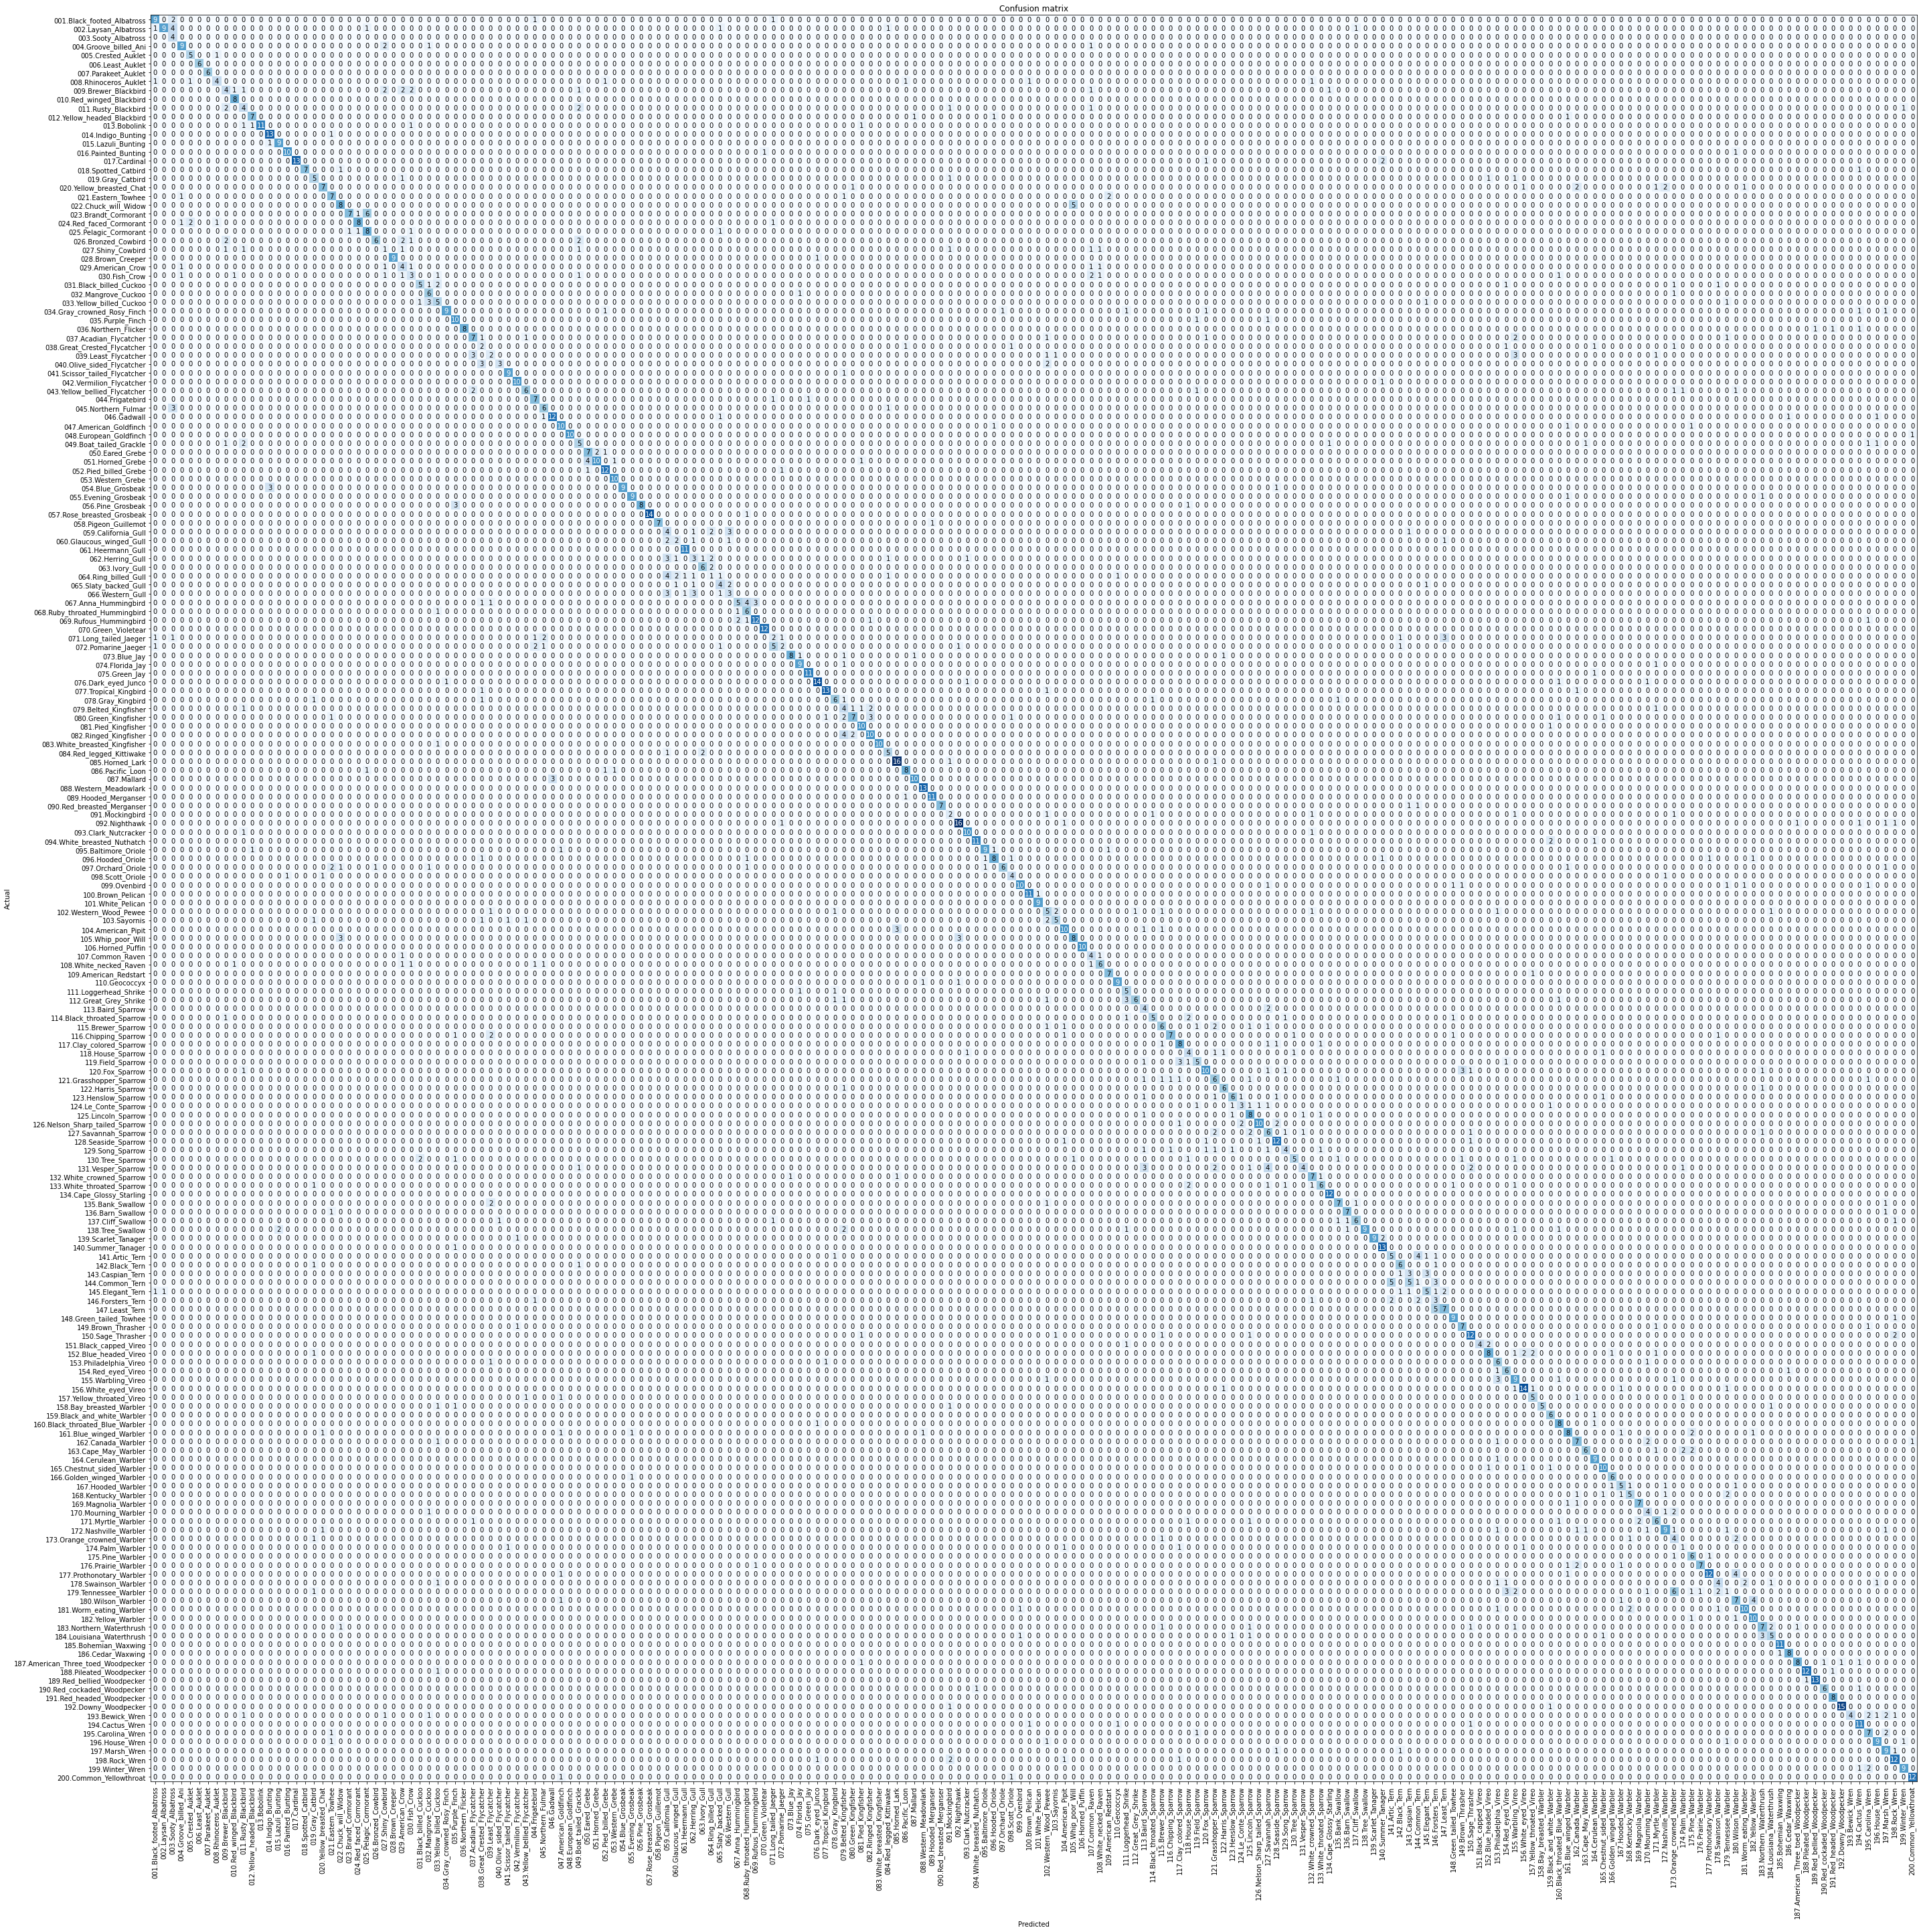

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(40,40))

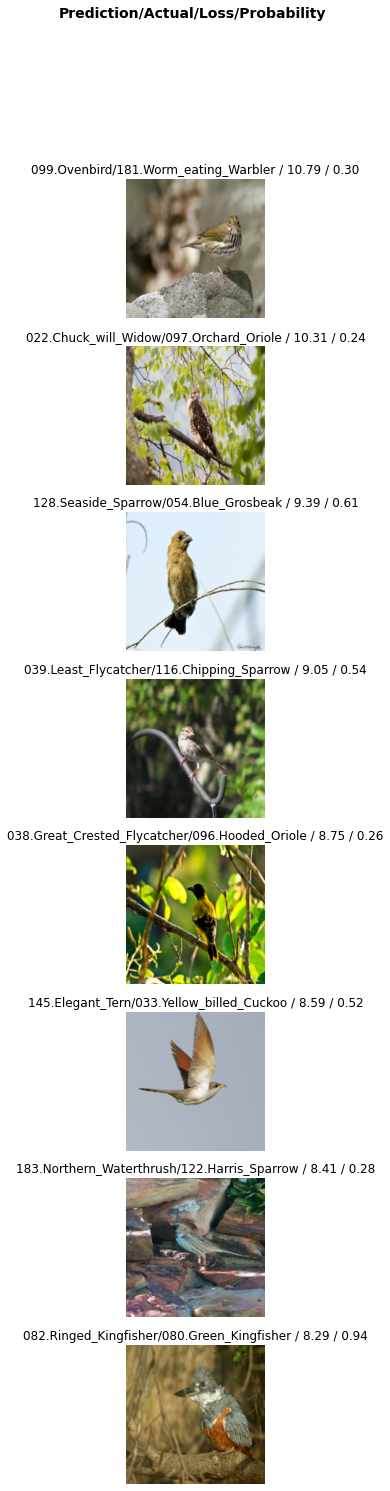

In [8]:
interp.plot_top_losses(k=8, nrows=8)

In [9]:

learn.export('bird_classif_model.pkl')

